In [1]:
%pip install strauss

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for strauss from https://files.pythonhosted.org/packages/71/01/715bba0c3ee7be938afcb685271457c6ad62cd0b446e11b402761a80c136/strauss-0.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for ffmpeg-python from https://files.pythonhosted.org/packages/d7/0c/56be52741f75bad4dc6555991fabd2e07b432d333da82c11ad701123888a/ffmpeg_python-0.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for pychord from https://files.pythonhosted.org/packages/a0/06/c589ecf304d44098dd3e4a08b692bb5024818c24d37abc5c0d9421f845f4/pychord-1.2.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/e8/fb/e5955e2ddbdf2baee461eb53ec8d0adedd20a6dfc5510ef8d5e7e44ba461/scipy-1.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.2 MB/s eta

In [1]:
%reload_ext autoreload 
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
from strauss.sonification import Sonification
from strauss.sources import Objects, Events
from strauss import channels
from strauss.score import Score
from strauss.generator import Synthesizer, Spectralizer, Sampler
from strauss import sources as Sources

import IPython.display as ipd
import os
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd
import requests

# modules to display in-notebook
import IPython.display as ipd
from IPython.display import display, Markdown, Latex, Image

In [2]:
y = pd.read_csv("manga/manga_7443_12703_path_props.csv")
#y = np.load('EO/eo_red.npy')

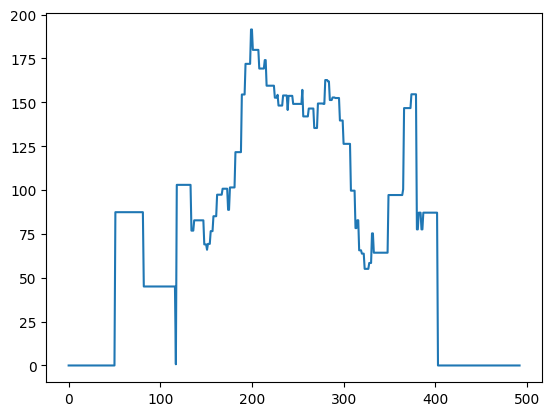

In [15]:
plt.plot(y["stellar_sigma"])
ar = y["stellar_sigma"]

## Pitch Map

In [16]:
# set an index to truncate the lightcurve (if it's too long...)
N = None
x = np.linspace(0,1, ar.size)


notes = [["A2"]]
score =  Score(notes, 15)

# set up synth (this generates the sound using mathematical waveforms)
generator = Synthesizer()
generator.preset_details('pitch_mapper')
generator.load_preset('pitch_mapper')


data = {'pitch':1.,
        'time_evo':x,
        'pitch_shift':ar}

# set 0 to 100 percentile limits so the full pitch and time range is used...
lims = {'time_evo': ('0','100'),
        'pitch_shift': ('0','100')}

# set up source
sources = Objects(data.keys())
sources.fromdict(data)
sources.apply_mapping_functions(map_lims=lims)

soni = Sonification(score, sources, generator, 'mono')
soni.render()
dobj = soni.notebook_display(show_waveform=1);

pitch_mapper:
preset for mapping pitch_shift for 1D data sonification. the single triangle wave oscillator provides a balance between harmonic richness and the harshness of the sound to allow clear audiability over a large pitch range.



KeyError: -1

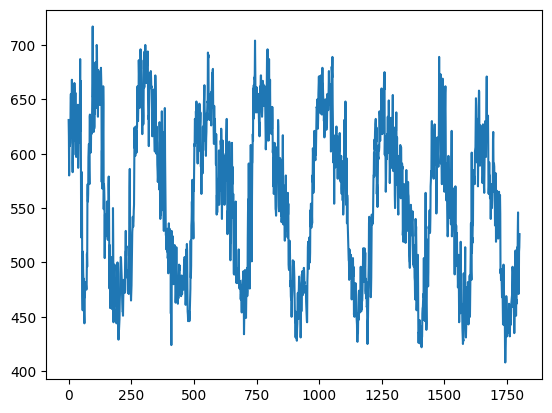

In [4]:
plt.plot(y)

## Timbre Map

In [5]:
generator = Synthesizer()
generator.modify_preset({'filter':'on'})

# uncomment these lines to try a 'textural' sonification using white noise! ✏️
# generator.load_preset('windy')
# generator.preset_details('windy')

# we use a 'chord' here to create more harmonic richness (stacking fifths)...
notes = [["A2", "E3", 'B3', 'F#4']]
score =  Score(notes, 15)

data = {'pitch':[0,1,2,3],
        'time_evo':[x]*4,
        'cutoff':[y]*4}

lims = {'time_evo': ('0','100'),
        'cutoff': ('0','100')}

# set up source
sources = Objects(data.keys())
sources.fromdict(data)
plims = {'cutoff': (0.15,0.95)}
sources.apply_mapping_functions(map_lims=lims, param_lims=plims)

soni = Sonification(score, sources, generator, 'mono')
soni.render()
dobj = soni.notebook_display(show_waveform=0);

100%|██████████| 4/4 [00:00<00:00,  6.09it/s]
